# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./traffic-signs-data/train.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

The dataset includes the following type of traffic signs:

No.0:


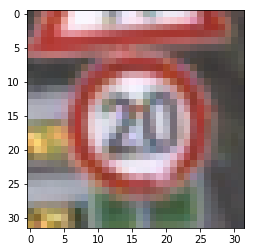

No.1:


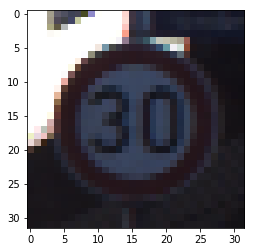

No.2:


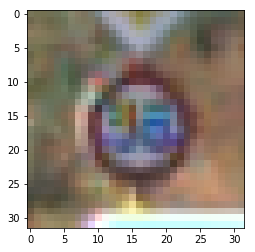

No.3:


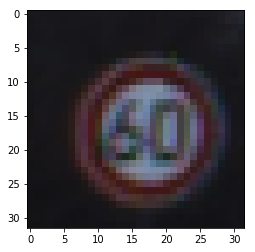

No.4:


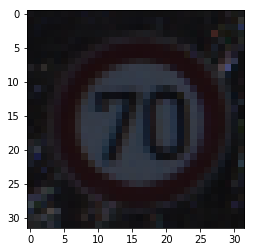

No.5:


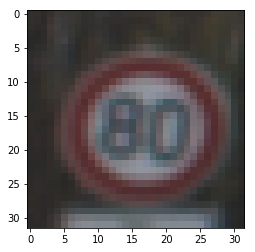

No.6:


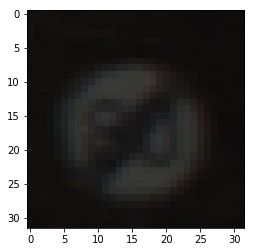

No.7:


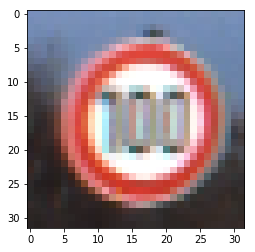

No.8:


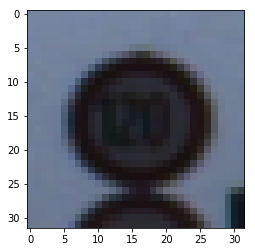

No.9:


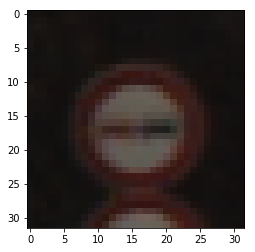

No.10:


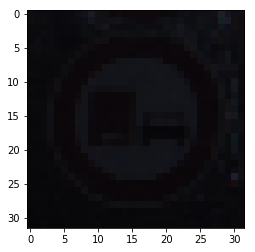

No.11:


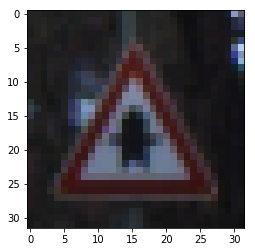

No.12:


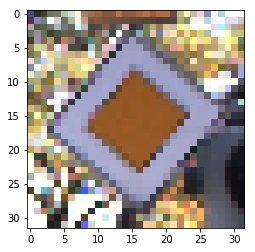

No.13:


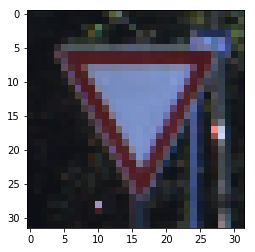

No.14:


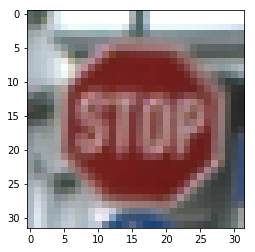

No.15:


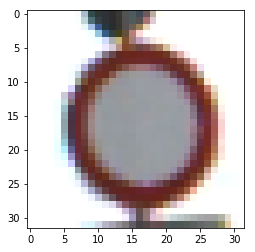

No.16:


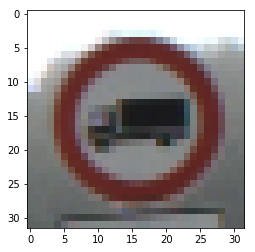

No.17:


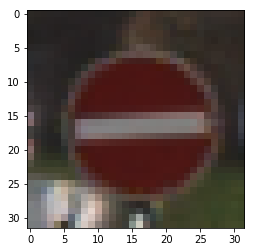

No.18:


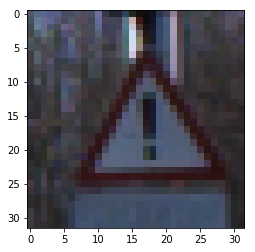

No.19:


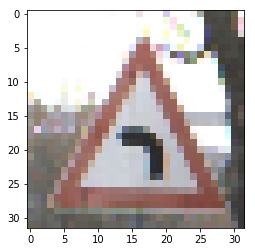

No.20:


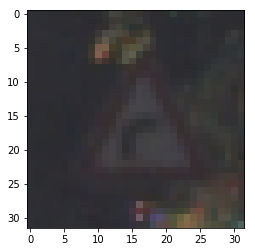

No.21:


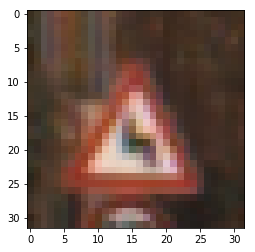

No.22:


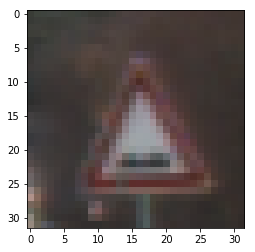

No.23:


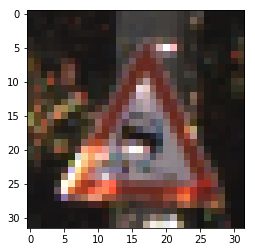

No.24:


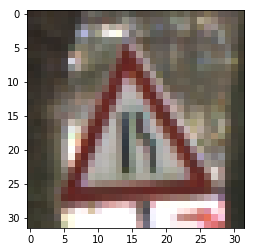

No.25:


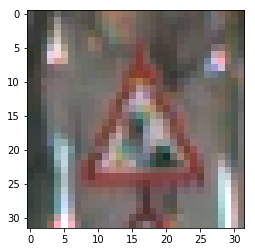

No.26:


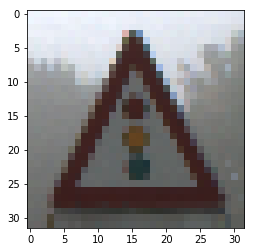

No.27:


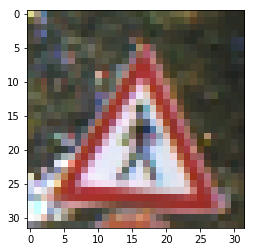

No.28:


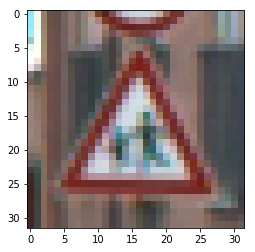

No.29:


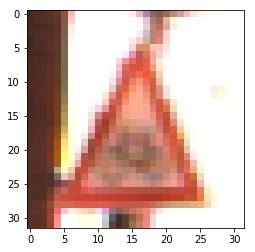

No.30:


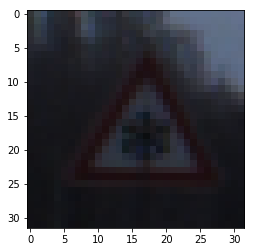

No.31:


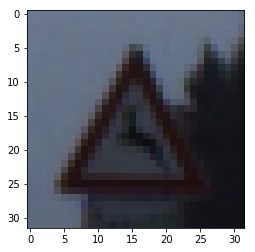

No.32:


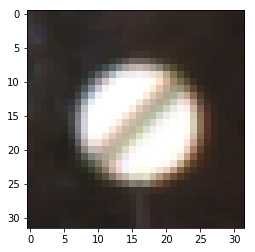

No.33:


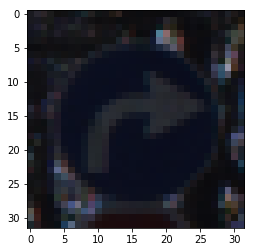

No.34:


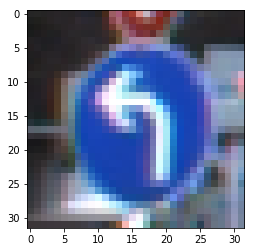

No.35:


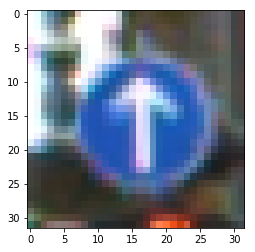

No.36:


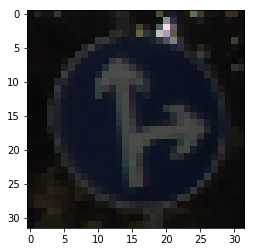

No.37:


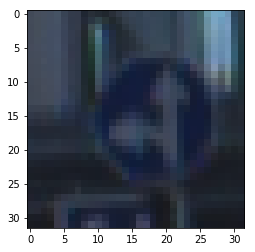

No.38:


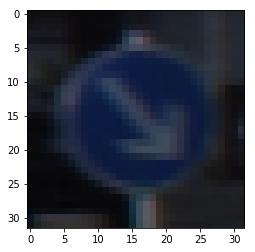

No.39:


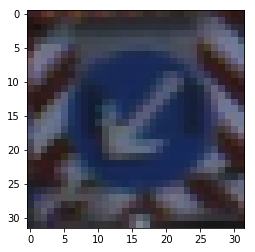

No.40:


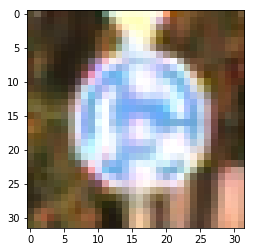

No.41:


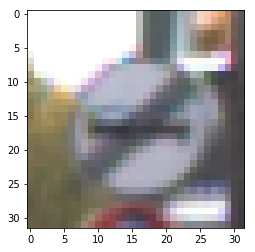

No.42:


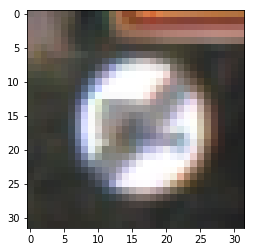

The following chart represents the number of each sign in the training set:


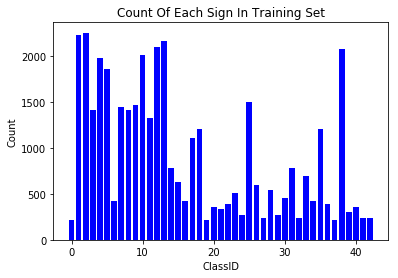

The following chart represents the number of each sign in the testing set:


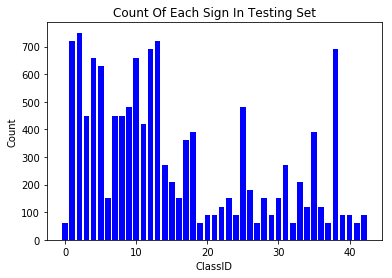

The signs could be overexposed:


/home/siyuan/anaconda2/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:63: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


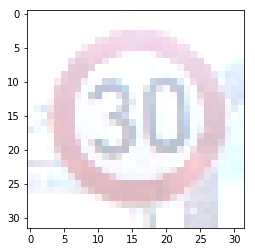

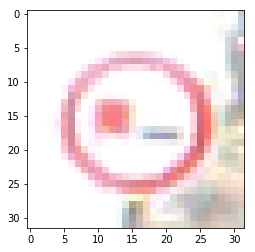

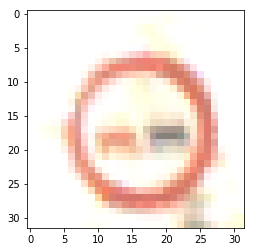

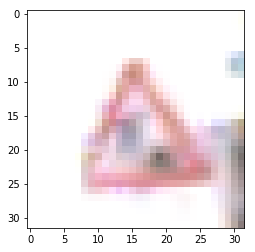

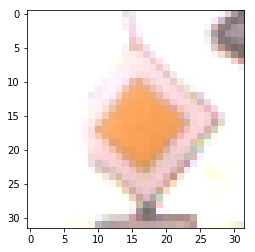

The signs could also be underexposed:


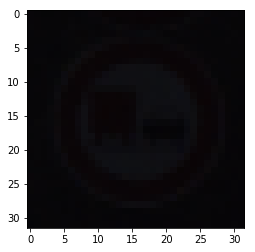

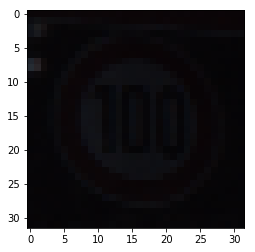

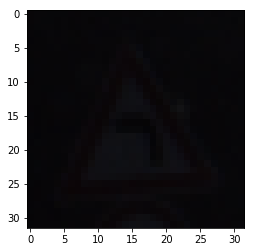

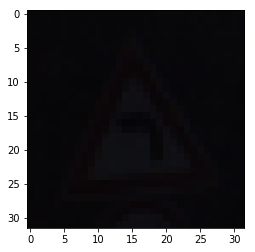

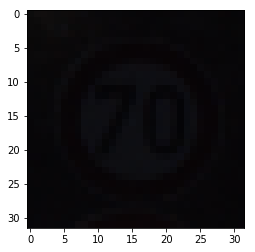

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import random
##plot traffic sign images
count_train = []
print("The dataset includes the following type of traffic signs:\n")
for i in range(n_classes):
    print("No.{}:".format(i))
    index_i = np.where(y_train==i)[0]
    count_i = len(index_i)
    count_train.append([i,count_i])
    random.seed(None)
    rand_i = random.randint(0,count_i-1)
    plt.imshow(X_train[index_i[rand_i]])
    plt.show()
    
##plot the count of each sign
# train_set
count_train = np.array(count_train)
print("The following chart represents the number of each sign in the training set:")
plt.bar(count_train[:,0], count_train[:,1], color='blue')
plt.xlabel("ClassID")
plt.ylabel("Count")
plt.title("Count Of Each Sign In Training Set")
plt.savefig('count_train',format='png')
plt.show()

# test_set
count_test = []
for i in range(n_classes):
    index_i = np.where(y_test==i)[0]
    count_i = len(index_i)
    count_test.append([i,count_i])
    
count_test = np.array(count_test)
print("The following chart represents the number of each sign in the testing set:")
plt.bar(count_test[:,0], count_test[:,1], color='blue')
plt.xlabel("ClassID")
plt.ylabel("Count")
plt.title("Count Of Each Sign In Testing Set")
plt.savefig('count_test',format='png')
plt.show()

## plot the signs with highest/lowest brightness
# sort the training set by their brightness
X_train_brightness = np.c_[np.mean(X_train, axis=(1,2,3)),np.arange(n_train)]
X_train_brightness = X_train_brightness[X_train_brightness[:,0].argsort()]

# index of first 50 overexposed images
overexp_50 = X_train_brightness[-1:-51:-1,1]
# index of first 100 underexposed images
underexp_50 = X_train_brightness[:50,1]

# random plot 5 images of a list
def plot_5(l,a):
    for i in range(5):
        random.seed(None)
        index = random.randint(0,len(l)-1)
        img = X_train[l[index]]
        plt.imshow(img)
        plt.savefig(a+str(i),format='png')
        plt.show()
    
print("The signs could be overexposed:")
plot_5(overexp_50, 'overexp')

    
print("The signs could also be underexposed:")
plot_5(underexp_50, 'underexp')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2

# grayscale and normalize brightness
def color2gray(img):
    out = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) #cv2.cvtColor(img,cv2.COLOR_RGB2YUV) 
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(3,3))
    out = clahe.apply(out)
    return out

X_test_backup = X_test.copy()

X_train = np.array([color2gray(i) for i in X_train])
X_test = np.array([color2gray(i) for i in X_test])
# normalize and zero-center each pixel
X_train_mean = np.mean(X_train, axis=0)
X_train_std = np.std(X_train, axis=0)

X_train = (X_train - X_train_mean) / X_train_std
X_test = (X_test - X_train_mean) / X_train_std

X_train = X_train.reshape([-1,32,32,1])
X_test = X_test.reshape([-1,32,32,1])

### Split Data into Training, Validation and Testing Sets

In [5]:
### Split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
        X_train, y_train, test_size=0.1)

### Model Architecture

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

# modified LeNet with feature number from "Traffic Sign Recognition with Multi-Scale Convolutional Networks"
# add dropout
def LeNet(x, n_classes, keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    strides = [1,1,1,1]
    ksize = [1,2,2,1]
    pool_strides = [1,2,2,1]
    # number of features in each layer
    n_c1 = 128
    n_c2 = 128
    n_f1 = 5*5*n_c2
    n_f2 = 100
    n_f3 = 50
    
    
    # Layer 1: Convolutional.
    wc1 = tf.Variable(tf.truncated_normal([5,5,1,n_c1],mean=mu,stddev=sigma))
    bc1 = tf.Variable(tf.zeros(n_c1))
    conv1 = tf.nn.conv2d(x, wc1, strides=strides, padding='VALID')
    conv1 = tf.nn.bias_add(conv1, bc1)

    # Activation.
    conv1 = tf.nn.relu(conv1)
    
    # Pooling.
    conv1 = tf.nn.max_pool(conv1, ksize=ksize, strides = pool_strides, padding='SAME')

    # Layer 2: Convolutional.
    wc2 = tf.Variable(tf.truncated_normal([5,5,n_c1,n_c2], mean=mu, stddev=sigma))
    bc2 = tf.Variable(tf.zeros(n_c2))
    conv2 = tf.nn.conv2d(conv1, wc2, strides=strides, padding='VALID')
    conv2 = tf.nn.bias_add(conv2, bc2)
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling.
    conv2 = tf.nn.max_pool(conv2, ksize=ksize, strides=pool_strides, padding='SAME')

    # Flatten.
    conv2 = tf.contrib.layers.flatten(conv2)
    
    # Layer 3: Fully Connected.
    wf1 = tf.Variable(tf.truncated_normal([n_f1,n_f2],mean=mu,stddev=sigma))
    bf1 = tf.Variable(tf.zeros(n_f2))
    fc1 = tf.add(tf.matmul(conv2, wf1), bf1)
    
    # Activation.
    fc1 = tf.nn.relu(fc1)
    
    # Dropout
    fc1 = tf.nn.dropout(fc1,keep_prob)

    # Layer 4: Fully Connected.
    wf2 = tf.Variable(tf.truncated_normal([n_f2,n_f3],mean=mu,stddev=sigma))
    bf2 = tf.Variable(tf.zeros(n_f3))
    fc2 = tf.add(tf.matmul(fc1, wf2), bf2)
    
    # Activation.
    fc2 = tf.nn.relu(fc2)
    
    # Dropout
    fc2 = tf.nn.dropout(fc2,keep_prob)

    # Layer 5: Fully Connected.
    wf3 = tf.Variable(tf.truncated_normal([n_f3,n_classes],mean=mu,stddev=sigma))
    bf3 = tf.Variable(tf.zeros(n_classes))
    logits = tf.add(tf.matmul(fc2, wf3), bf3)
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [7]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# train parameters
EPOCHS = 20
BATCH_SIZE = 32
# Features and Labels #
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

# Training Pipeline #
rate = 0.001
keep_prob = tf.placeholder(tf.float32)

logits = LeNet(x,n_classes, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# Model Evaluation #
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train the Model ###
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.6})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")
    
# Evaluate the Model #
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Training...

EPOCH 1 ...
Validation Accuracy = 0.851

EPOCH 2 ...
Validation Accuracy = 0.931

EPOCH 3 ...
Validation Accuracy = 0.962

EPOCH 4 ...
Validation Accuracy = 0.968

EPOCH 5 ...
Validation Accuracy = 0.977

EPOCH 6 ...
Validation Accuracy = 0.983

EPOCH 7 ...
Validation Accuracy = 0.988

EPOCH 8 ...
Validation Accuracy = 0.986

EPOCH 9 ...
Validation Accuracy = 0.986

EPOCH 10 ...
Validation Accuracy = 0.987

EPOCH 11 ...
Validation Accuracy = 0.986

EPOCH 12 ...
Validation Accuracy = 0.985

EPOCH 13 ...
Validation Accuracy = 0.991

EPOCH 14 ...
Validation Accuracy = 0.989

EPOCH 15 ...
Validation Accuracy = 0.990

EPOCH 16 ...
Validation Accuracy = 0.991

EPOCH 17 ...
Validation Accuracy = 0.986

EPOCH 18 ...
Validation Accuracy = 0.992

EPOCH 19 ...
Validation Accuracy = 0.991

EPOCH 20 ...
Validation Accuracy = 0.989

Model saved
Test Accuracy = 0.961


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

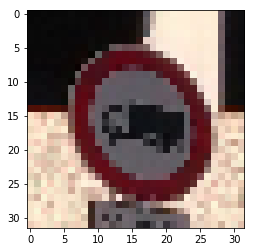

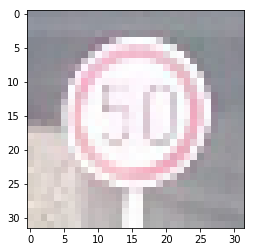

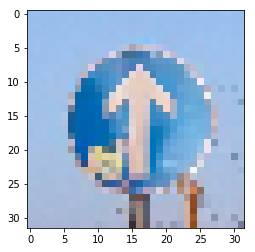

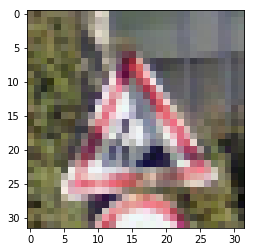

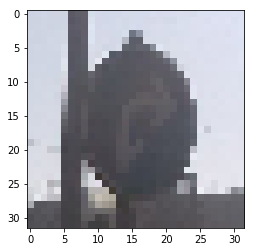

In [8]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os, glob
# path for extra signs
ulpath = "extra-signs/"
# load the images
extra_img = []

for file in glob.glob(os.path.join(ulpath, "*.jpg")):
    img = cv2.imread(file, 1)
    img = cv2.resize(img, (32,32))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    extra_img.append(img)
    plt.imshow(img)
    plt.show()

### Predict the Sign Type for Each Image

In [9]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
# label the extra signs
extra_y = np.array([16,2,35,25,33])
# preprocess the extra signs
extra_X = np.array([color2gray(i) for i in extra_img])
extra_X = (extra_X - X_train_mean) / X_train_std
extra_X = extra_X.reshape([-1,32,32,1])
# reserve space for prediction
extra_predict = np.zeros(extra_y.shape)
# import the signnames.csv as a dictionary
import csv
signlist = {}
with open('signnames.csv', newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        signlist[row[0]] = row[1]
# run the model to predict the signs
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    extra_logits = sess.run(tf.nn.softmax(logits), feed_dict={x: extra_X, keep_prob: 1.0})
    extra_predict = np.argmax(extra_logits, axis=1)
    for i in range(extra_predict.shape[0]):
        print("Image {} is sign for {}, it's predicted to be {}".format(
                i+1, signlist[str(extra_y[i])], signlist[str(extra_predict[i])]))
        print()

Image 1 is sign for Vehicles over 3.5 metric tons prohibited, it's predicted to be Vehicles over 3.5 metric tons prohibited

Image 2 is sign for Speed limit (50km/h), it's predicted to be Speed limit (50km/h)

Image 3 is sign for Ahead only, it's predicted to be Ahead only

Image 4 is sign for Road work, it's predicted to be Road work

Image 5 is sign for Turn right ahead, it's predicted to be Turn right ahead



### Analyze Performance

In [10]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
print("Accuracy for extra signs = {:.3f}".format(
        np.sum(extra_predict==extra_y) / float(extra_y.shape[0])))

Accuracy for extra signs = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [11]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    num_examples = extra_X.shape[0]
    #TopK = sess.run(tf.nn.top_k(logits, k=5), feed_dict={x: extra_X, keep_prob: 1.0})
    TopK = sess.run(tf.nn.top_k(tf.constant(extra_logits),k=5))
    TopK_name = []
    
    for i in range(TopK.indices.shape[0]):
        new = []
        for j in range(TopK.indices.shape[1]):
            new.append(signlist[str(TopK.indices[i][j])]+':'+str(TopK.values[i][j]))
        TopK_name.append(new)
    
    TopK_name = np.array(TopK_name)
    
    for i in range(len(extra_y)):
        print("Image {} is sign for {}".format(i+1, signlist[str(extra_y[i])]))
        print("Top 5 predicts of it are: {}".format(TopK_name[i]))
        print()

Image 1 is sign for Vehicles over 3.5 metric tons prohibited
Top 5 predicts of it are: ['Vehicles over 3.5 metric tons prohibited:0.996824'
 'Speed limit (100km/h):0.00160864' 'Speed limit (120km/h):0.000922827'
 'Roundabout mandatory:0.000643361' 'Speed limit (70km/h):6.489e-07']

Image 2 is sign for Speed limit (50km/h)
Top 5 predicts of it are: ['Speed limit (50km/h):0.998939' 'Speed limit (80km/h):0.000360464'
 'Speed limit (60km/h):0.000312862' 'Speed limit (100km/h):0.000241668'
 'Speed limit (30km/h):7.82653e-05']

Image 3 is sign for Ahead only
Top 5 predicts of it are: ['Ahead only:0.999999' 'Priority road:8.1525e-07'
 'Go straight or right:7.62306e-09' 'Yield:2.06669e-10'
 'Turn left ahead:3.93857e-11']

Image 4 is sign for Road work
Top 5 predicts of it are: ['Road work:0.994767' 'General caution:0.00442894'
 'Road narrows on the right:0.000355298' 'Traffic signals:0.000242132'
 'Bicycles crossing:0.000152018']

Image 5 is sign for Turn right ahead
Top 5 predicts of it are: 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 